<a href="https://colab.research.google.com/github/yeesem/Deep_Learning/blob/main/Cats_and_Dogs_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-04-08 04:55:05--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.207, 142.250.136.207, 142.250.148.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   205MB/s    in 0.3s    

2024-04-08 04:55:06 (205 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile

# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()

zip_ref.close()

In [3]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory")
print(os.listdir(base_dir))

print("\nContents of train directory")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory
['validation', 'vectorize.py', 'train']

Contents of train directory
['dogs', 'cats']

Contents of validation directory
['dogs', 'cats']


In [4]:
import os

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

# Directory with training cat/dog pictures
train_cat_dir = os.path.join(train_dir,'cats')
train_dog_dir = os.path.join(train_dir,'dogs')

# Directory with validation cat/dog pictures
validation_cat_dir = os.path.join(validation_dir,'cats')
validation_dog_dir = os.path.join(validation_dir,'dogs')

In [5]:
train_cat_fnames = os.listdir(train_cat_dir)
train_dog_fnames = os.listdir(train_dog_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.157.jpg', 'cat.436.jpg', 'cat.302.jpg', 'cat.214.jpg', 'cat.513.jpg', 'cat.861.jpg', 'cat.221.jpg', 'cat.283.jpg', 'cat.489.jpg', 'cat.574.jpg']
['dog.58.jpg', 'dog.707.jpg', 'dog.623.jpg', 'dog.330.jpg', 'dog.744.jpg', 'dog.194.jpg', 'dog.397.jpg', 'dog.389.jpg', 'dog.294.jpg', 'dog.862.jpg']


In [6]:
print("Total training cat images : ", len(train_cat_fnames))
print("Total training dog images : ", len(train_dog_fnames))

print('Total validation cat images : ', len(os.listdir(validation_cat_dir)))
print('Total validation dog images : ', len(os.listdir(validation_dog_dir)))

Total training cat images :  1000
Total training dog images :  1000
Total validation cat images :  500
Total validation dog images :  500


In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 4

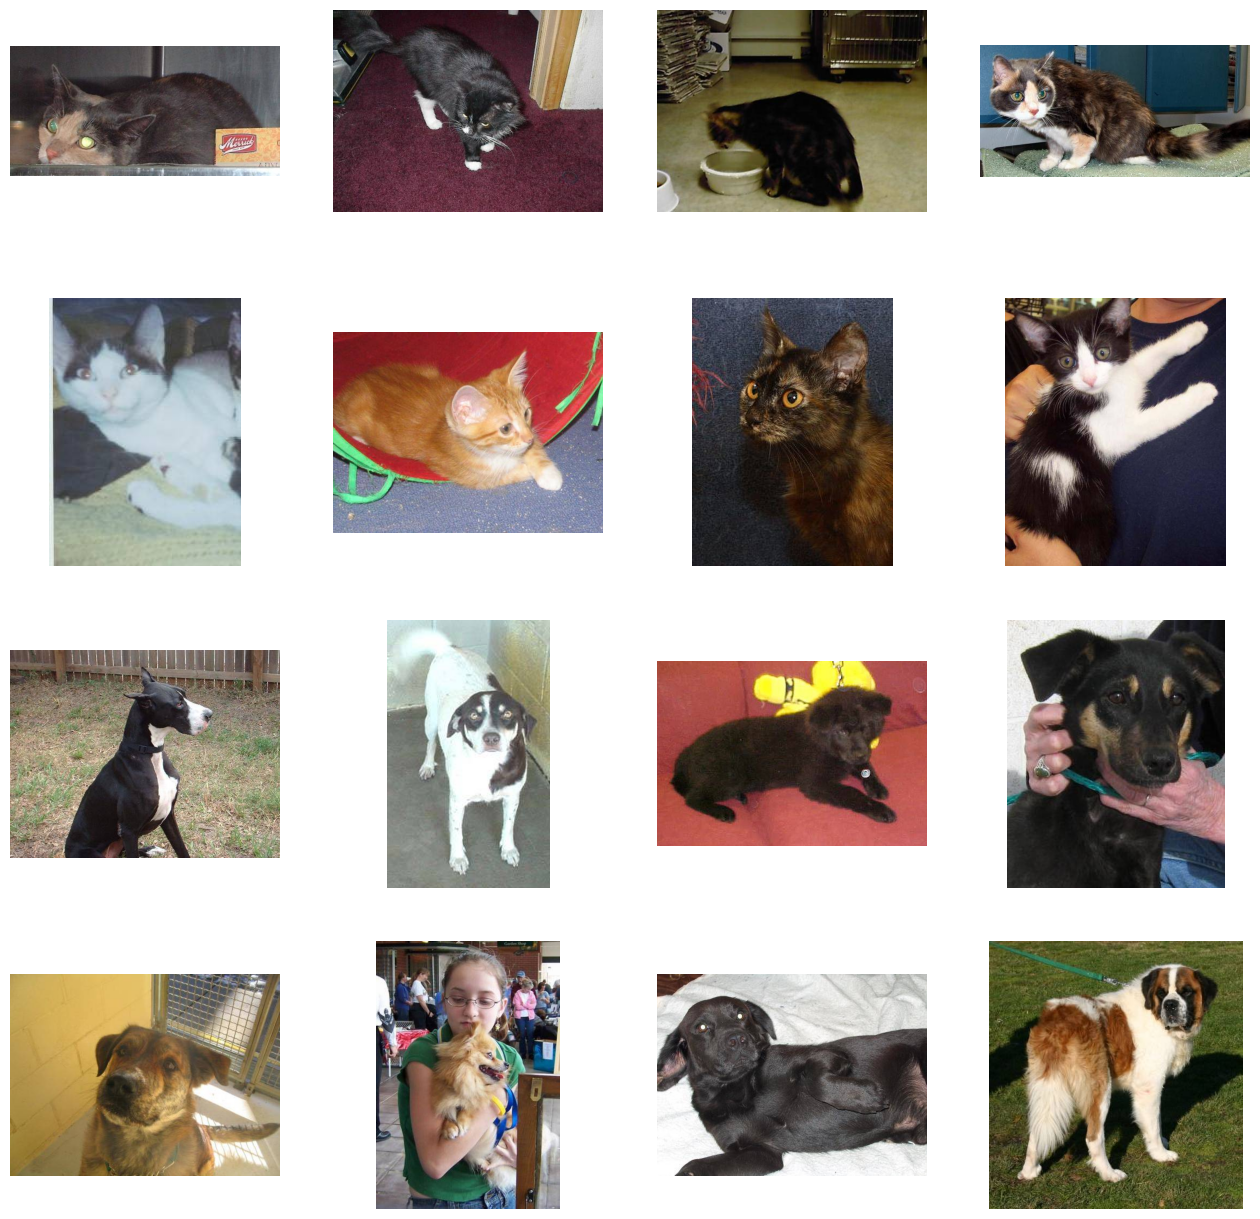

In [8]:
# Set up matplotlib fig, and size i to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cat_dir,fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dog_dir,fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second convolutional layer
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third convolutional layer
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Connected layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150,150)
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
history = model.fit(
    train_generator,
    epochs = 15,
    validation_data = validation_generator,
    verbose = 2
)

Epoch 1/15
100/100 - 10s - loss: 0.7541 - accuracy: 0.5275 - val_loss: 0.6880 - val_accuracy: 0.5010 - 10s/epoch - 101ms/step
Epoch 2/15
100/100 - 6s - loss: 0.6694 - accuracy: 0.6125 - val_loss: 0.6195 - val_accuracy: 0.6800 - 6s/epoch - 61ms/step
Epoch 3/15
100/100 - 4s - loss: 0.6142 - accuracy: 0.6885 - val_loss: 0.5729 - val_accuracy: 0.7050 - 4s/epoch - 43ms/step
Epoch 4/15
100/100 - 6s - loss: 0.5403 - accuracy: 0.7345 - val_loss: 0.5471 - val_accuracy: 0.7210 - 6s/epoch - 55ms/step
Epoch 5/15
100/100 - 4s - loss: 0.4654 - accuracy: 0.7705 - val_loss: 0.5416 - val_accuracy: 0.7260 - 4s/epoch - 43ms/step
Epoch 6/15
100/100 - 4s - loss: 0.3974 - accuracy: 0.8115 - val_loss: 0.6333 - val_accuracy: 0.6790 - 4s/epoch - 44ms/step
Epoch 7/15
100/100 - 5s - loss: 0.3278 - accuracy: 0.8465 - val_loss: 0.6010 - val_accuracy: 0.7270 - 5s/epoch - 50ms/step
Epoch 8/15
100/100 - 4s - loss: 0.2559 - accuracy: 0.8920 - val_loss: 0.6105 - val_accuracy: 0.7200 - 4s/epoch - 44ms/step
Epoch 9/15
10

<Figure size 640x480 with 0 Axes>

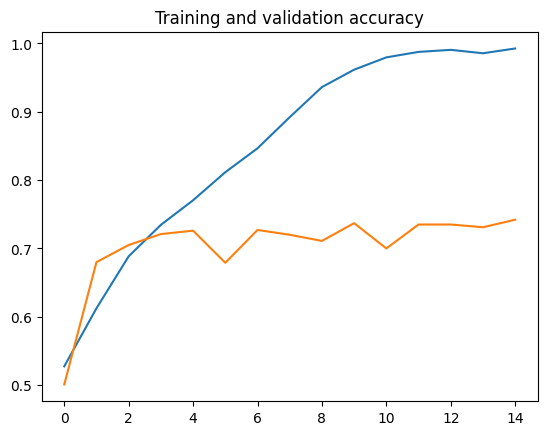

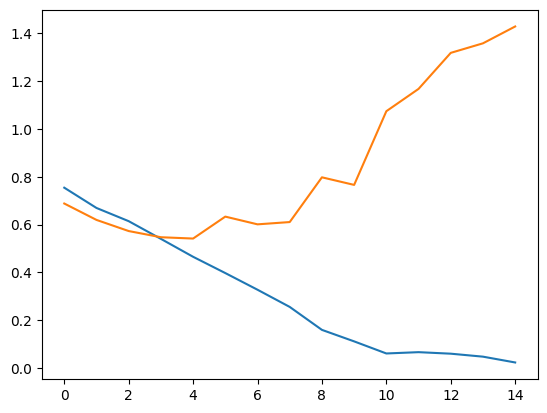

<Figure size 640x480 with 0 Axes>

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.figure('Training and validation loss')

In [19]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")


Saving download (1).jpeg to download (1).jpeg
1/1 [==============================] - 0s 25ms/step
[1.2847985e-07]
download (1).jpeg is a cat
